# Time Series - Beyond Forecasting
* We already know how to forecast time series
* Can we try to predict other things using time series?

Todays dataset: [Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
rain_df = pd.read_csv("data/weatherAUS 3.csv")
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
rain_df.shape

(145460, 23)

In [7]:
rain_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<Axes: >

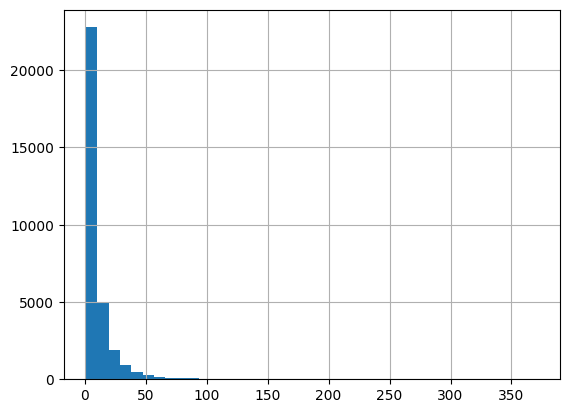

In [11]:
rain_df[rain_df['RainToday']=='Yes']['Rainfall'].hist(bins=40)

In [12]:
rain_df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

Can we predict whether or not it will rain tomorrow based on today's measurements?

**Goals**
* Can the date/time features help us predict the target value?
* Can we **forecast** into the future?
* Can we predict whether it's going to rain tomorrow?
* The target variable is RainTomorrow. The target is categorical and not continuous in this case.

In [7]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
rain_df.describe(include="all")

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


* A number of missing values
* Some target values are also missing. I'm dropping these rows

#### Parsing datetimes
* In general, datetimes are a huge pain
* A lot of different formats: MM-DD-YY, DD-MM-YY, YY-MM-DD, MM/DD/YY, DD/MM/YY, DD/MM/YYYY, 20:45, 8:45am, 8:45 PM, 8:45a, 08:00, 8:10:20, .......
* Time zones, etc.

In [13]:
dates_rain = pd.to_datetime(rain_df['Date'])

In [14]:
dates_rain

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [16]:
dates_rain[1] - dates_rain[0]

Timedelta('1 days 00:00:00')

In [17]:
dates_rain[1] > dates_rain[0]

True

In [18]:
(dates_rain[1] - dates_rain[0]).total_seconds()

86400.0

In [19]:
dates_rain[1]

Timestamp('2008-12-02 00:00:00')

In [20]:
dates_rain[1].month_name()

'December'

In [21]:
dates_rain[1].day_name()

'Tuesday'

In [22]:
dates_rain[1].is_year_end

False

In [23]:
dates_rain[1].is_leap_year

True

In [24]:
rain_df = pd.read_csv("data/weatherAUS 3.csv", parse_dates=['Date'])

In [25]:
rain_df.dtypes

Date             datetime64[ns]
Location                 object
MinTemp                 float64
MaxTemp                 float64
Rainfall                float64
Evaporation             float64
Sunshine                float64
WindGustDir              object
WindGustSpeed           float64
WindDir9am               object
WindDir3pm               object
WindSpeed9am            float64
WindSpeed3pm            float64
Humidity9am             float64
Humidity3pm             float64
Pressure9am             float64
Pressure3pm             float64
Cloud9am                float64
Cloud3pm                float64
Temp9am                 float64
Temp3pm                 float64
RainToday                object
RainTomorrow             object
dtype: object

Dropping missing targets..

In [26]:
rain_df = rain_df[rain_df['RainTomorrow'].notna()]
rain_df.shape

(142193, 23)

In [27]:
rain_df["Date"].head()

0   2008-12-01
1   2008-12-02
2   2008-12-03
3   2008-12-04
4   2008-12-05
Name: Date, dtype: datetime64[ns]

## Train/test splits

* Remember that we should not be calling the usual `train_test_splot` with shuffling because
* If we want to forecast, we aren't allowed to know what happened in the future!

In [28]:
rain_df['Date'].min()

Timestamp('2007-11-01 00:00:00')

In [29]:
rain_df['Date'].max()

Timestamp('2017-06-25 00:00:00')

* We have 10 years of data
* Let's use the last 2 years for test

In [30]:
train_df = rain_df.query("Date <= 20150630")
test_df = rain_df.query("Date > 20150630")

In [31]:
train_df.shape

(107502, 23)

In [32]:
test_df.shape

(34691, 23)

In [34]:
test_df.shape[0]/(train_df.shape[0] + test_df.shape[0])

0.24397122221206388

In [36]:
train_df['Location'].value_counts()

Location
Canberra            2696
Sydney              2611
Darwin              2467
Perth               2467
Hobart              2463
Brisbane            2444
Adelaide            2369
AliceSprings        2314
MountGambier        2314
Bendigo             2314
Townsville          2313
Cairns              2310
Launceston          2306
Albany              2305
Ballarat            2304
Albury              2290
GoldCoast           2289
PerthAirport        2283
MelbourneAirport    2283
SydneyAirport       2283
WaggaWagga          2283
Watsonia            2282
NorfolkIsland       2282
Mildura             2281
Sale                2281
Nuriootpa           2280
Tuggeranong         2279
Cobar               2277
Portland            2274
Woomera             2274
Wollongong          2267
Newcastle           2255
Penrith             2252
Witchcliffe         2240
SalmonGums          2235
CoffsHarbour        2229
Richmond            2228
BadgerysCreek       2226
NorahHead           2220
Dartmoor        

In [56]:
train_df_sort = train_df.query("Location == 'Sydney'").sort_values(by="Date")
test_df_sort = test_df.loc[test_df['Location']=='Sydney'].sort_values(by="Date")

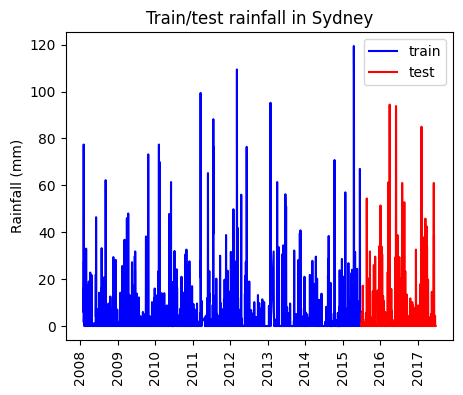

In [60]:
plt.figure(figsize=(5, 4))

plt.plot(train_df_sort["Date"], train_df_sort["Rainfall"], "b", label="train")
plt.plot(test_df_sort["Date"], test_df_sort["Rainfall"], "r", label="test")
plt.xticks(rotation="vertical")
plt.legend()
plt.ylabel("Rainfall (mm)")
plt.title("Train/test rainfall in Sydney");

In [61]:
train_df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [62]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107502 entries, 0 to 144733
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           107502 non-null  datetime64[ns]
 1   Location       107502 non-null  object        
 2   MinTemp        107050 non-null  float64       
 3   MaxTemp        107292 non-null  float64       
 4   Rainfall       106424 non-null  float64       
 5   Evaporation    66221 non-null   float64       
 6   Sunshine       62320 non-null   float64       
 7   WindGustDir    100103 non-null  object        
 8   WindGustSpeed  100146 non-null  float64       
 9   WindDir9am     99515 non-null   object        
 10  WindDir3pm     105314 non-null  object        
 11  WindSpeed9am   106322 non-null  float64       
 12  WindSpeed3pm   106319 non-null  float64       
 13  Humidity9am    106112 non-null  float64       
 14  Humidity3pm    106180 non-null  float64       
 15  Press

* We have missing data
* We have categorical features and numerical features

In [68]:
numeric_features = [
    'MinTemp', 
    'MaxTemp', 
    'Rainfall', 
    'Evaporation',
    'Sunshine', 
    'WindGustSpeed', 
    'WindSpeed9am', 
    'WindSpeed3pm', 
    'Humidity9am', 
    'Humidity3pm',
    'Pressure9am', 
    'Pressure3pm', 
    'Cloud9am', 
    'Cloud3pm', 
    'Temp9am',
    'Temp3pm'
]

categorical_features = [
    'Location',
    'WindGustDir',
    'WindDir9am', 
    'WindDir3pm',
    'RainToday',
]

drop_features = ["Date"]

target = ["RainTomorrow"]

In [115]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

def preprocess_features(train_df, test_df, numeric_features, categorical_features, drop_features, target):

    all_features = set(numeric_features + categorical_features + drop_features + target)

    if set(train_df.columns) != all_features:
        print("Missing columns", set(train_df.columns) - all_features)
        print("Extra columns", all_featues - set(train_df.columns))
        raise Exception("Columns do not match")

    numeric_transformer = make_pipeline(
        SimpleImputer(strategy="median"), StandardScaler()
    )
    categorical_transformer = make_pipeline(
        SimpleImputer(strategy="constant", fill_value="missing"),
        OneHotEncoder(handle_unknown="ignore")
    )
    preprocessor = make_column_transformer(
        (numeric_transformer, numeric_features),
        (categorical_transformer, categorical_features),
        ("drop", drop_features)
    )
    preprocessor.fit(train_df)

    ohe_feature_names = list(
        preprocessor.named_transformers_["pipeline-2"].get_feature_names_out(
        categorical_features
    )
    )
    new_columns = numeric_features + ohe_feature_names
    x_sparse_train = preprocessor.transform(train_df)
    x_sparse_test = preprocessor.transform(test_df)
    X_train_enc = pd.DataFrame(x_sparse_train.todense(), index = train_df.index, columns = new_columns)
    X_test_enc = pd.DataFrame(x_sparse_test.todense(), index=test_df.index, columns = new_columns)

    y_train = train_df["RainTomorrow"]
    y_test = test_df["RainTomorrow"]

    return X_train_enc, y_train, X_test_enc, y_test, preprocessor



In [116]:
X_train_enc, y_train, X_test_enc, y_test, preprocessor = preprocess_features(
    train_df,
    test_df,
    numeric_features,
    categorical_features,
    drop_features, target
)

### DummyClassifier

In [118]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier()
dc.fit(train_df, y_train)

DummyClassifier()

In [119]:
dc.score(train_df, y_train)

0.7750553478074826

In [120]:
y_train.value_counts()

RainTomorrow
No     83320
Yes    24182
Name: count, dtype: int64

In [121]:
dc.score(test_df, y_test)

0.7781845435415525

## LogisticRegression

In [124]:
from sklearn.linear_model import LogisticRegression
lr_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
lr_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cl...', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday']),
                                                 ('drop', 'drop', ['Date'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [125]:
lr_pipe.fit(train_df, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cl...', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am', 'WindDir3pm',
                                                   'RainToday']),
                                                 ('drop', 'drop', ['Date'])])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [128]:
lr_pipe.named_steps['logisticregression'].coef_

array([[ 0.14156678, -0.42369452,  0.08267059,  0.03424748, -0.32529294,
         0.71852434, -0.07113135, -0.15203697,  0.07124299,  1.24711887,
         0.87109397, -1.22730443, -0.02645558,  0.30005059,  0.1094227 ,
         0.2638415 ,  0.59208421, -0.51377204,  0.56433461, -0.04179648,
         0.3686426 , -0.25730264,  0.28532367,  0.42257378, -0.03899636,
         0.08122942,  0.38406788,  0.0305444 ,  0.00911744, -0.52661305,
        -0.15377049, -0.52771082, -0.68351628, -0.189007  , -0.13770148,
        -0.53421266,  0.10382904,  0.04750938,  0.09048781, -0.97589481,
        -0.27914823, -0.01545427, -0.45613923, -0.45595597, -0.05550806,
         0.36839516,  0.53650237,  0.62467832,  0.44274988, -0.01161433,
         0.280784  , -0.26295154,  0.44329141, -0.05563605, -0.12269677,
        -0.73856365,  0.37317384,  0.05690898,  0.2103481 ,  0.21577198,
        -0.21814217,  0.16878419,  0.70989262, -0.76781905, -0.22824223,
        -0.07072884, -0.06836229,  0.02941536, -0.1

In [131]:
def score_lr_print_coeff(preprocessor, train_df, y_train, test_df, y_test, X_train_enc):
    lr_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
    lr_pipe.fit(train_df, y_train)

    print("Train score: {:.2f}".format(lr_pipe.score(train_df, y_train)))
    print("Test score: {:.2f}".format(lr_pipe.score(test_df, y_test)))

    lr_coef = pd.DataFrame(
        data=lr_pipe.named_steps['logisticregression'].coef_.flatten(),
        index = X_train_enc.columns,
        columns=["Coef"]
    )
    return lr_coef.sort_values(by="Coef", ascending=False)
    
    

In [132]:
score_lr_print_coeff(preprocessor, train_df, y_train, test_df, y_test, X_train_enc)

Train score: 0.85
Test score: 0.84


,Coef
Humidity3pm,1.247119
Pressure9am,0.871094
WindGustSpeed,0.718524
Location_Witchcliffe,0.709893
RainToday_missing,0.651446
...,...
Location_Townsville,-0.738564
Location_Wollongong,-0.767819
Location_MountGinini,-0.975895
RainToday_No,-0.994764


## Next steps
* Cross-validation
* Feature Engineering: Date time features

### Cross-validation
* `TimeSeriesSplit`
* Our dataset is really complicated, there are multiple time series, one per location

In [133]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144729,2015-06-26,Uluru,3.8,18.3,0.0,NaN,NaN,E,39.0,ESE,...,73.0,37.0,1031.5,1027.6,NaN,NaN,8.8,17.2,No,No
144730,2015-06-27,Uluru,2.5,17.1,0.0,NaN,NaN,E,41.0,ESE,...,69.0,40.0,1029.9,1026.0,NaN,NaN,7.0,15.7,No,No
144731,2015-06-28,Uluru,4.5,19.6,0.0,NaN,NaN,ENE,35.0,ESE,...,69.0,39.0,1028.7,1025.0,NaN,3.0,8.9,18.0,No,No
144732,2015-06-29,Uluru,7.6,22.0,0.0,NaN,NaN,ESE,33.0,SE,...,67.0,37.0,1027.2,1023.8,6.0,7.0,11.7,21.5,No,No


In [134]:
train_df.sort_values(by=["Date", "Location"]).head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


* It seems the dataframe is sorted by location, and then time
* Our approach today will be to ignore the fact that we have multiple time series and just OHE location
* We'll have multiple measurements for a given timestamp
* `TimeSeriesSplit` expects the dataframe to be sorted by date so...

In [136]:
train_df_ordered = train_df.sort_values(by=["Date"])
y_train_ordered = train_df_ordered["RainTomorrow"]

In [137]:
train_df_ordered

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
45587,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
45588,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
45589,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
45590,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
45591,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57415,2015-06-30,Ballarat,-0.3,10.5,0.0,NaN,NaN,S,26.0,NaN,...,99.0,63.0,1029.5,1027.7,NaN,8.0,4.7,9.3,No,No
119911,2015-06-30,PerthAirport,10.1,23.5,0.0,3.2,5.8,NNE,31.0,NE,...,48.0,33.0,1023.6,1021.7,7.0,6.0,13.3,22.2,No,No
60455,2015-06-30,Bendigo,0.3,11.4,0.0,NaN,NaN,W,19.0,NaN,...,89.0,56.0,1029.3,1027.4,8.0,7.0,6.4,10.5,No,No
66473,2015-06-30,MelbourneAirport,3.2,13.2,0.0,0.8,3.9,N,20.0,N,...,91.0,50.0,1029.6,1027.3,2.0,7.0,5.3,11.9,No,No


In [138]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
lr = make_pipeline(preprocessor, LogisticRegression(max_iter=1000))
cross_val_score(lr_pipe, train_df_ordered, y_train_ordered, cv=TimeSeriesSplit()).mean()

0.8478316682480326

## To be continued...

* Feature Engineering